In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
Combine_Snaps = pd.read_csv('football.csv')


In [3]:
Combine_Snaps.columns

Index(['Unnamed: 0', 'Name', 'Unnamed: 0.1', '20 Yard Shuttle', '40 Yard Dash',
       '60 Yard Shuttle', 'Arm Length', 'Bench Press', 'Broad Jump', 'College',
       'Grade', 'Hands', 'Height', 'Position', 'Three Cone Drill',
       'Vertical Jump', 'Weight', 'Wonderlic', 'Year', 'SnapsPlayed_y'],
      dtype='object')

In [4]:
Combine_Snaps.dtypes

Unnamed: 0            int64
Name                 object
Unnamed: 0.1          int64
20 Yard Shuttle     float64
40 Yard Dash        float64
60 Yard Shuttle     float64
Arm Length          float64
Bench Press         float64
Broad Jump          float64
College              object
Grade               float64
Hands               float64
Height              float64
Position             object
Three Cone Drill    float64
Vertical Jump       float64
Weight                int64
Wonderlic           float64
Year                  int64
SnapsPlayed_y         int64
dtype: object

In [10]:
Combine_Snaps2 = Combine_Snaps.drop(['Name', 'Unnamed: 0', 'Unnamed: 0.1', '60 Yard Shuttle', 'College', 'Position', 'Grade', 'Wonderlic'], axis=1)

In [11]:
Combine_Snaps2.columns

Index(['20 Yard Shuttle', '40 Yard Dash', 'Arm Length', 'Bench Press',
       'Broad Jump', 'Hands', 'Height', 'Three Cone Drill', 'Vertical Jump',
       'Weight', 'Year', 'SnapsPlayed_y'],
      dtype='object')

In [12]:
Combine_Snaps2.dtypes

20 Yard Shuttle     float64
40 Yard Dash        float64
Arm Length          float64
Bench Press         float64
Broad Jump          float64
Hands               float64
Height              float64
Three Cone Drill    float64
Vertical Jump       float64
Weight                int64
Year                  int64
SnapsPlayed_y         int64
dtype: object

In [13]:
Combine_Snaps2.describe()

,20 Yard Shuttle,40 Yard Dash,Arm Length,Bench Press,Broad Jump,Hands,Height,Three Cone Drill,Vertical Jump,Weight,Year,SnapsPlayed_y
count,991.000000,1041.000000,1070.000000,1025.000000,1046.000000,1070.000000,1070.000000,998.000000,1047.000000,1070.000000,1070.000000,1070.000000
mean,3.274934,4.412815,16.264252,13.804878,105.894837,4.815654,72.768925,3.331152,31.687679,216.100935,2011.318692,1840.909346
std,1.776745,0.875243,16.023118,9.233038,38.737498,4.735905,2.257282,3.493370,10.616484,23.982007,4.118943,1623.636793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,0.000000,156.000000,1999.000000,21.000000
25%,3.925000,4.450000,0.000000,7.000000,113.000000,0.000000,71.000000,0.000000,32.000000,198.000000,2009.000000,518.750000
50%,4.170000,4.550000,29.625000,16.000000,119.000000,8.250000,73.000000,0.000000,34.500000,212.000000,2012.000000,1346.500000
75%,4.300000,4.660000,32.000000,20.000000,123.000000,9.375000,74.000000,6.970000,37.000000,231.000000,2015.000000,2699.250000
max,4.950000,5.400000,35.375000,36.000000,147.000000,11.250000,79.000000,7.940000,46.000000,375.000000,2017.000000,6961.000000


In [14]:
## 2699.25 = 3rd quartile ##

Combine_Snaps2['SnapsPlayed_y'].mean()

1840.9093457943925

In [15]:
Combine_Snaps2['SnapsPlayed_y'].median()

1346.5

Text(0.5,0.98,'')

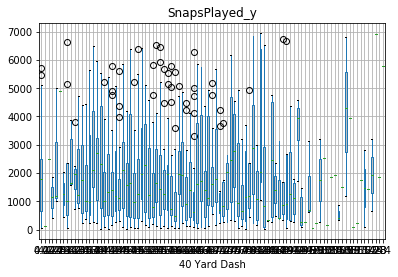

In [16]:
Combine_Snaps2.boxplot(column='SnapsPlayed_y', by = '40 Yard Dash')
plt.suptitle("")

Text(0.5,0.98,'')

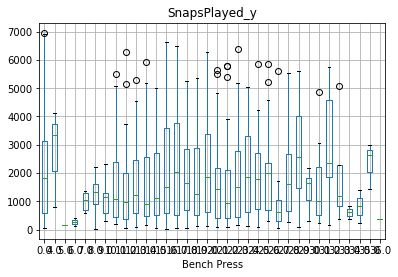

In [46]:
Combine_Snaps2.boxplot(column='SnapsPlayed_y', by = 'Bench Press')
plt.suptitle("")

Text(0.5,0.98,'')

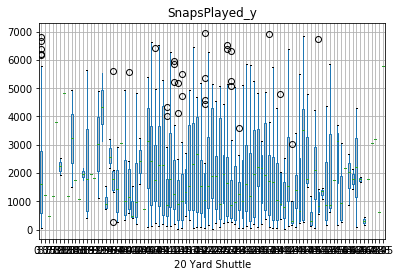

In [47]:
Combine_Snaps2.boxplot(column='SnapsPlayed_y', by = '20 Yard Shuttle')
plt.suptitle("")

Text(0.5,0.98,'')

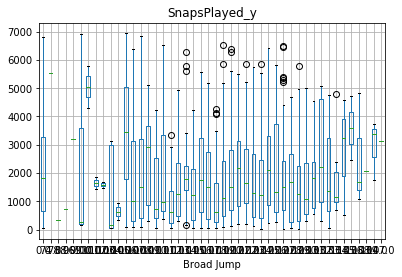

In [48]:
Combine_Snaps2.boxplot(column='SnapsPlayed_y', by = 'Broad Jump')
plt.suptitle("")

Text(0.5,0.98,'')

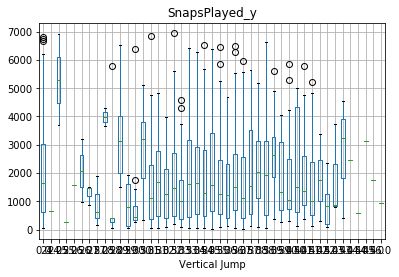

In [49]:
Combine_Snaps2.boxplot(column='SnapsPlayed_y', by = 'Vertical Jump')
plt.suptitle("")

Text(0.5,0.98,'')

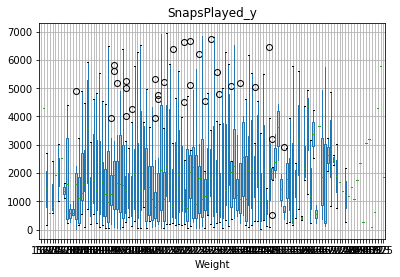

In [50]:
Combine_Snaps2.boxplot(column='SnapsPlayed_y', by = 'Weight')
plt.suptitle("")

In [ ]:
##Address this hard dropna()
## fillna(mean)
Combine_Snaps2 = Combine_Snaps2.dropna()

In [26]:


# X (data) and y (target)
X = Combine_Snaps2[['40 Yard Dash', 'Weight', 'Height', 'Bench Press', '20 Yard Shuttle', 'Broad Jump', 'Vertical Jump']]
y = Combine_Snaps2['SnapsPlayed_y'].values.reshape(-1, 1)
print(X.shape, y.shape)


(973, 7) (973, 1)


In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1)


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

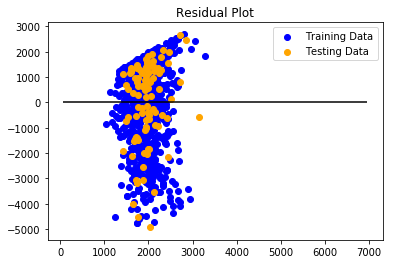

In [29]:
# Make predictions using the X_testdata
# Plot y_test_scaled vs y_test
# Scatter plot y_test vs predictions

predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2547613.622836263, R2: -0.04379327647401766


In [31]:
##Optional Model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 2547603.1441648137, R2: -0.043788983214354094


In [32]:
##Optional Model
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 2547613.079927911, R2: -0.043793054036799235


In [33]:
##Optional Model
from sklearn.linear_model import ElasticNet


elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 2547372.2862338205, R2: -0.043694397460049876


In [ ]:
#Reset (X,y) For RandomForest##

In [95]:
#Decision Tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [100]:
# X (data) and y (target)
X = Combine_Snaps2[['40 Yard Dash', 'Height', 'Bench Press', '20 Yard Shuttle', 'Broad Jump', 'Vertical Jump']]
y = Combine_Snaps2[['SnapsPlayed_y', 'Weight']]
print(X.shape, y.shape)

(973, 6) (973, 2)


In [101]:

clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf.fit(X, y)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [102]:
print(clf.feature_importances_)

[0.18714339 0.29235782 0.20445777 0.09718696 0.1245578  0.09429626]


In [106]:
print(clf.predict([[0, 0, 0, 0, 0, 0]]))

[[2160.  196.]]


In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
grid_search=RandomizedSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [117]:
# Estimating the optimized value
grid_search

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)